# Projeto Titanic - Melhor Pontuação (0.79665)

## Edmur Cristóforo Neto - nº 12558492

Classificação de passageiros sobreviventes (ou não) no Titanic, de acordo com o banco de dados fornecido pelo Kaggle

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [2]:
# Importação do banco de dados de treino e teste do Titanic

df_test = pd.read_csv("test.csv", header=0)
df_train_original = pd.read_csv("train.csv", header=0)

df_train_original.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Pré Processamento

Primeiramente, devemos obter informações a respeito do banco de dados, os dados faltantes e colunas redundantes. Desse modo, vemos que possuem colunas que não agregam informações a análise, como o nome do passageiro, o ticket e a Cabine.

In [4]:
df_train = df_train_original[df_train_original.columns.drop(["PassengerId","Name", "Ticket", "Cabin"])]
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
PassengerId_test = df_test["PassengerId"]
df_test = df_test[df_test.columns.drop(["PassengerId","Name", "Ticket", "Cabin"])]
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


Agora podemos avaliar os dados faltantes dos conjuntos de teste e treino, tomando cuidado para não vazar informações entre eles.

In [6]:
print(df_test.isna().sum())

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


In [7]:
print(df_train.isna().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


Vemos que existem muitos dados faltantes para a coluna Idade e alguns outros para o resto das colunas. Vamos substituir os dados ordinais pela média e dados nominais pela moda.

In [9]:
df_test["Age"] = df_test["Age"].fillna(df_test['Age'].mean())
df_test["Fare"] = df_test["Fare"].fillna(df_test["Fare"].mean())

df_train["Age"] = df_train["Age"].fillna(df_train["Age"].mean())
df_train["Fare"] = df_train["Fare"].fillna(df_train["Fare"].mean())
df_train["Embarked"] = df_train["Embarked"].fillna(df_train["Embarked"].mode()[0])


print(df_train.isna().sum())
print(df_test.isna().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


/tmp/ipykernel_5651/617878434.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Age"] = df_train["Age"].fillna(df_train["Age"].mean())
/tmp/ipykernel_5651/617878434.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["Fare"] = df_train["Fare"].fillna(df_train["Fare"].mean())
/tmp/ipykernel_5651/617878434.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

Ao realizar a limpeza dos dados, observamos que existe variáveis nominais como Sexo, Classes e Porto de embarque, desse modo, podemos aplicar o método de One Hot Enconding para tornar aplicável o modelo. 

In [10]:
df_train = pd.get_dummies(df_train)
df_train = pd.get_dummies(df_train, columns=['Pclass'])
df_train.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


In [11]:
df_test = pd.get_dummies(df_test)
df_test = pd.get_dummies(df_test, columns=['Pclass'])
df_test.head()

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,34.5,0,0,7.8292,0,1,0,1,0,0,0,1
1,47.0,1,0,7.0000,1,0,0,0,1,0,0,1
2,62.0,0,0,9.6875,0,1,0,1,0,0,1,0
3,27.0,0,0,8.6625,0,1,0,0,1,0,0,1
4,22.0,1,1,12.2875,1,0,0,0,1,0,0,1


Agora, podemos padronizar o atributo Fare.

In [12]:
data_train = df_train.to_numpy()
nrow, ncol = data_train.shape
y = data_train[:, 0]
X = data_train[:, 1:ncol]
X_test = df_test.to_numpy()

print(X_test.shape)

(418, 12)


In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X)
X_test = scaler.fit_transform(X_test)

Ainda, dentro dessa etapa podemos verificar se os dados estão balanceados para análise, assim contabilizamos a quantidade de Sobrevivente e Não sobreviventes.

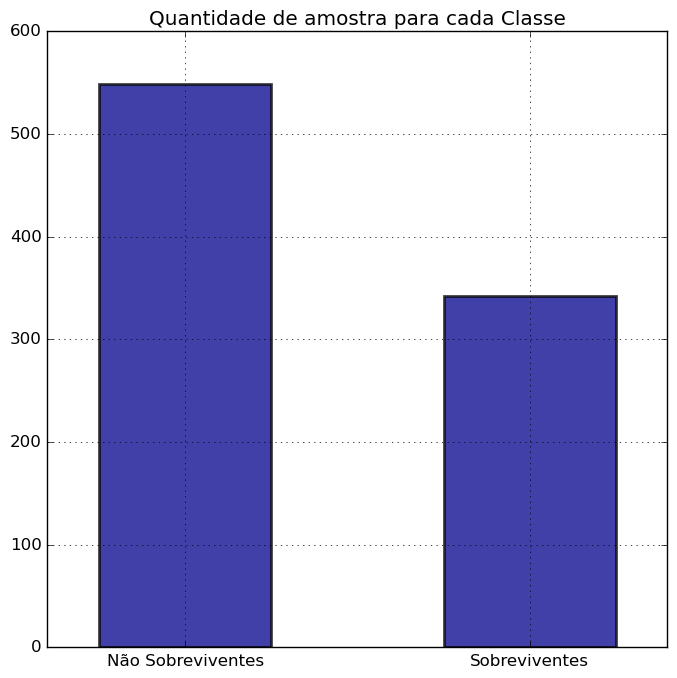

In [14]:
classes = np.unique(y)
ncl = np.zeros(len(classes))

for i in np.arange(0, len(classes)):
    a = y == classes[i]
    ncl[i] = len(y[a])

numbers = np.arange(0, len(classes))
leg = ["Não Sobreviventes", "Sobreviventes"]

plt.figure(figsize=(8,8))
plt.style.use("classic")
plt.grid(True)
plt.bar(numbers, ncl, alpha=.75, width=0.5, color="darkblue", linewidth=2, tick_label=leg)
plt.xticks(numbers)
plt.title("Quantidade de amostra para cada Classe")
plt.show()


Vemos que temos mais Não Sobreviventes do que Sobreviventes, porém a diferença não é tão discrepante. Portanto não há necessidade a primeira vista do balanceamento dos dados.

# Análise Exploratória 

Nesta etapa, será realizado por meio de gráficos uma análise para tentar explicitar característica da amostra relevantes para o modelo.

Começando pela análise de correlação entre os atributos do Dataframe:

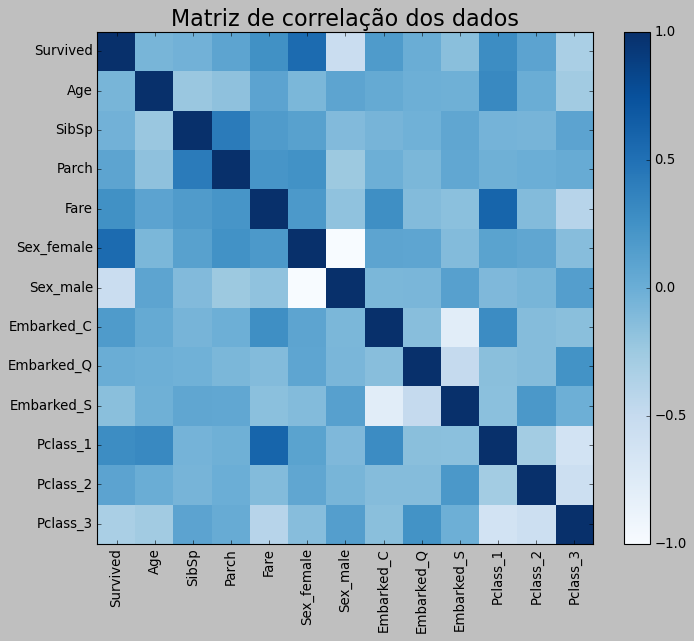

In [15]:
corr = df_train.corr()

plt.figure(figsize=(10,8))

plt.imshow(corr, cmap="Blues", interpolation="none", aspect="auto")
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation="vertical")
plt.yticks(range(len(corr)), corr.columns)
plt.title("Matriz de correlação dos dados", fontsize=20)
plt.grid(False)
plt.show()

Observamos uma correlação entre os Sobreviventes e o fato de serem Mulheres, além da correlação dos Sobreviente com o fato de estarem na primeira classe e com o preço pago pela passagem.

Agora, estudamos especificamente a relação do sexo com a sobrevivência.

In [16]:

contagem = df_train.groupby("Sex_male")["Survived"].value_counts(normalize=True)

print(contagem)

Sex_male  Survived
0         1           0.742038
          0           0.257962
1         0           0.811092
          1           0.188908
Name: Survived, dtype: float64


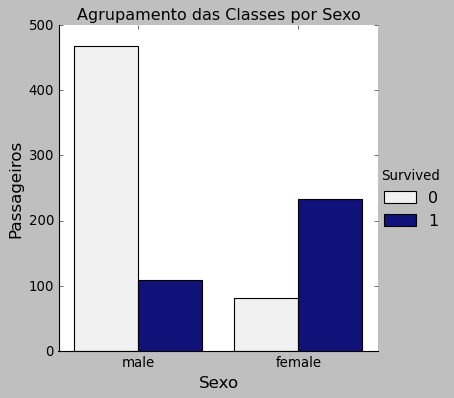

In [17]:
sns.catplot(df_train_original, x= "Sex", hue= "Survived", kind="count", color="DarkBlue")
plt.xlabel("Sexo", fontsize=15)
plt.ylabel("Passageiros",fontsize=15)
plt.title("Agrupamento das Classes por Sexo")
plt.show()

Vemos que realmente, dentre as pessoas do sexo feminino houveram mais sobreviventes. Outra análise possível é o agrupamento quanto a idade.

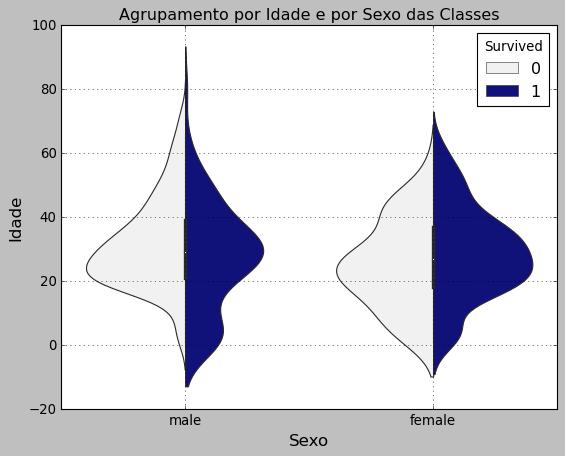

In [18]:
sns.violinplot(df_train_original, x = "Sex", y = "Age", hue="Survived", split=True, color="DarkBlue")
plt.xlabel("Sexo", fontsize=15)
plt.ylabel("Idade", fontsize=15)
plt.title("Agrupamento por Idade e por Sexo das Classes")
plt.grid(True)
plt.show()

Vemos que as crianças tem mais chances de terem sobrevivido dentre as pessoas do sexo masculino.

Podemos realizar o estudo quanto as classes das cabines:

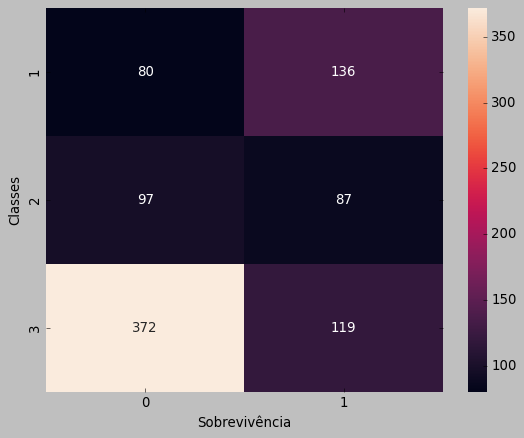

In [19]:
group = df_train_original.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
sns.heatmap(pclass_survived, annot=True, fmt="d")
plt.xlabel("Sobrevivência")
plt.ylabel("Classes")
plt.show()

Observamos que dentre as classes, a grande discrepância está na classe 3, sendo que nesta a maior parte das pessoas morreram. Agora, podemos avaliar a diferença entre sobreviventes quanto ao valor da passagem.

<Axes: xlabel='Fare', ylabel='Survived'>

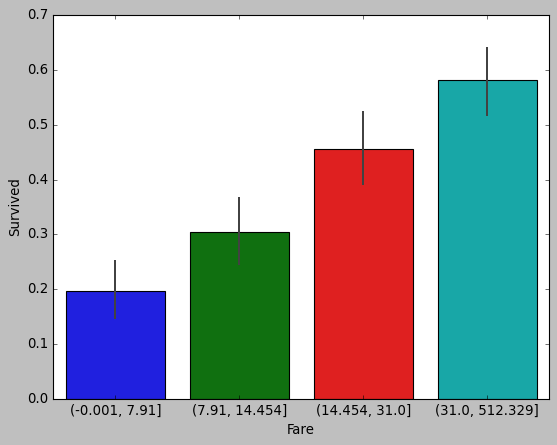

In [20]:
df_train_original["Fare"] = pd.qcut(df_train_original["Fare"], 4)

sns.barplot(df_train_original, x="Fare", y="Survived")

Desse modo, observamos que há realmente uma correlação entre o preço e a sobrevivência, demosntrando que quem pagou valores mais altos tiveram mais chance de sobreviver. Outra análise possível, é quanto aos portos de embarque:

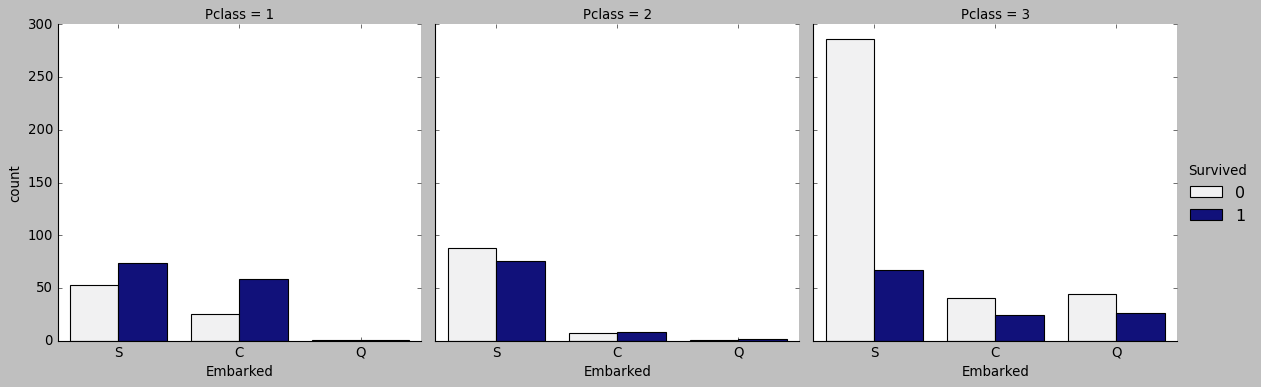

In [21]:
# Countplot
sns.catplot(x ='Embarked', hue ='Survived',
kind ='count', col ='Pclass', data = df_train_original, color="darkblue")


Vemos que a maioria dos passageiros eram do porto S, e dentre essses, da maioria dos que morreram estavam na classe 3, mas não vemos uma correlação explícita com os portos, e sim, com a classe. Podemos verificar como a informação da classe influencia na informação do sexo.

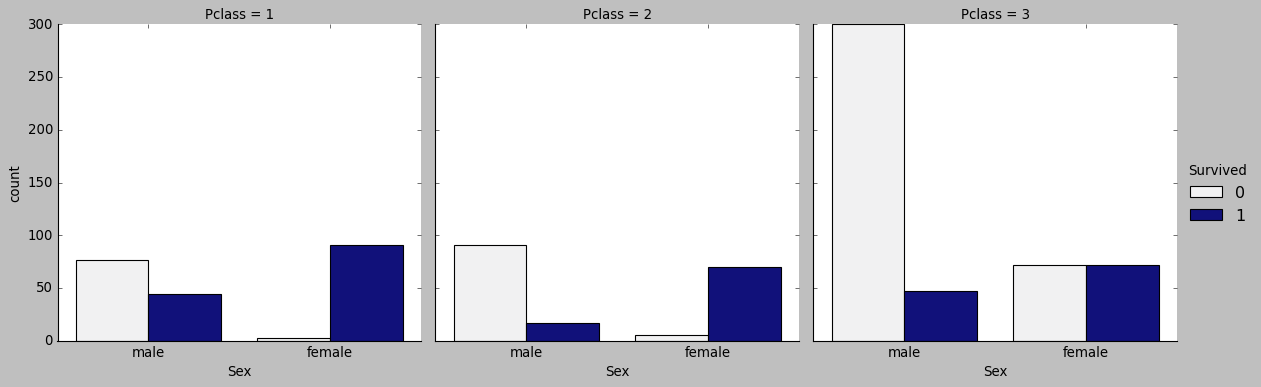

In [22]:
# Countplot
sns.catplot(x ='Sex', hue ='Survived',
kind ='count', col ='Pclass', data = df_train_original, color="darkblue")


Vemos que basicamente só morreu mulheres na classe 3, evidenciando que a informação de estar na classe 3 inflencia mais do que o sexo. Agora, analisamos a questão dos familiares a bordo:

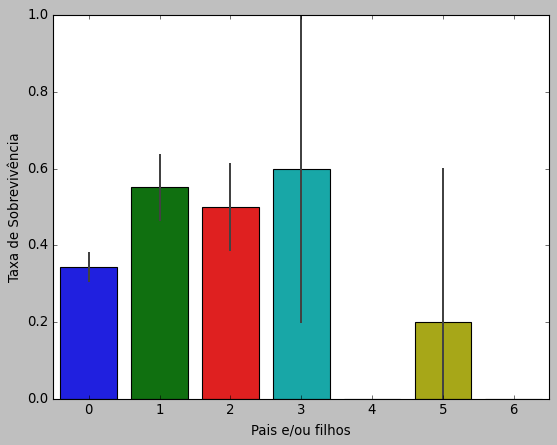

In [26]:
sns.barplot(df_train_original, x = "Parch", y = "Survived")
plt.xlabel("Pais e/ou filhos")
plt.ylabel("Taxa de Sobrevivência")
plt.show()

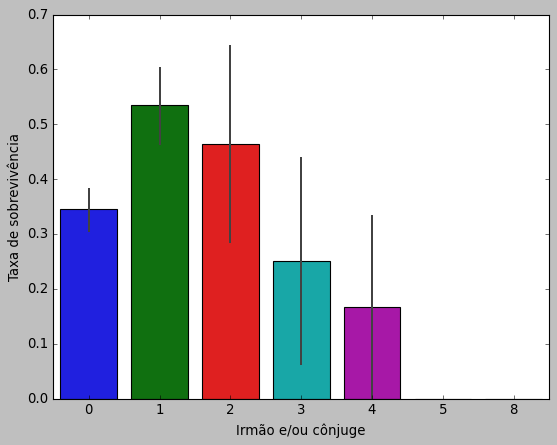

In [24]:
sns.barplot(df_train_original, x="SibSp", y="Survived")
plt.xlabel("Irmão e/ou cônjuge")
plt.ylabel("Taxa de sobrevivência")
plt.show()

Observamos que os passageiros que possuem pais e/ou filhos a bordo tem maior taxa de sobrevivência daqueles que não possuem. 

Já, quanto aos passageiros terem irmãos ou cônjuge, observamos que aqueles que possuem 1 desses parentes tem mais chances de sobreviverem, isso pode ser explicado pelo alto índice de mulheres sobreviventes que provavelmente tinha 1 cônjuge. Desse modo, essa coluna não está totalmente correlacionada. 

Com isso, temos uma visão de como os atributos estão ligados a sobrevivência dos passageiros.

Agora, realizamos um análise da separação das classes. Projetando os dados em 2D com os atributos mais importantes para a separação:

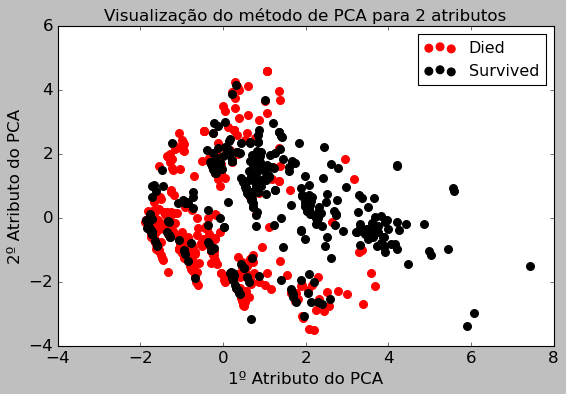

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train)

#implementação para visualização do método

classes = np.unique(y)

colors = ['r', 'black']
aux = 0
plt.figure(figsize=(8,5))
for c in classes:
    if c == 1:
        lb = 'Survived'
    else:
        lb = 'Died'
    nodes = np.where(y == c)
    plt.scatter(pca_result[nodes,0], pca_result[nodes,1], s=50, color = colors[aux], 
                label = lb)
    aux = aux + 1
plt.legend()
plt.xlabel("1º Atributo do PCA", fontsize=15)
plt.ylabel("2º Atributo do PCA", fontsize=15)
plt.xticks(color='k', size=15)
plt.yticks(color='k', size=15)
plt.title("Visualização do método de PCA para 2 atributos", fontsize = 15)
plt.show(True)

Vemos que utilizando os dois atributos de maiores parâmetros de variação do método, não conseguimos separar as classes. Podemos observar quantas classes são relevantes utilizando uma outra aplicação do método PCA.

In [28]:
#Quantos atributos são necessários para uma variação de 80% 

pca2 = PCA(0.80)

pca_results2 = pca2.fit_transform(X_train)

print(pca_results2.shape)
print(X_train.shape)
pca2.explained_variance_ratio_

(891, 6)
(891, 12)


array([0.22562063, 0.17783236, 0.1637185 , 0.12308204, 0.09412182,
       0.07790944])

Portanto, para obter 80% de variação dentro dos dados necessitamos de no mínimo 6 dos 12 atributos, além disso, vemos que cada atributo contribui relevantemente para a variação. 

# Seleção e Ajuste dos Modelos

Vamos analizar a performace de diversos modelos no conjunto de teste e selecionar os melhores hiperparâmetros dos mesmos, realizando o processo de cross-validation pelo fato do desbalanceamento das classes, utilizando o método GridSearchCV.

Começamos com o método de KNN.

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

params = {
    "n_neighbors" : np.arange(1,50),
    "metric" : ['euclidean', 'minkowski','chebyshev', 'manhattan']
}

knn = KNeighborsClassifier()

model = GridSearchCV(knn, params, cv=10, scoring="roc_auc")

grid = model.fit(X_train, y)

print(f"Best parameters: {grid.best_params_} \nBest Score: {grid.best_score_:.3f}")

Best parameters: {'metric': 'manhattan', 'n_neighbors': 9} 
Best Score: 0.862


In [30]:
import warnings

warnings.filterwarnings("ignore")

Agora vamos realizar o mesmo método para o modelo de classificação por Regressão Logística

In [31]:
from sklearn.linear_model import LogisticRegression

params_LR = {
    "penalty" : [None, "l1", "l2", "elasticnet"],
    "C" : np.logspace(-4, 4, 20),
    "class_weight" : [None, "balanced"],
    "solver" : ['lbfgs', "newton-cg", "liblinear", "sag", "saga"],
    "max_iter" : [100, 1000, 2000, 5000]
}

LR = LogisticRegression()

model_LR = GridSearchCV(LR, param_grid=params_LR, cv=10, scoring="roc_auc", return_train_score=True)

grid_LR = model_LR.fit(X_train, y)

print(f"Best parameters: {grid_LR.best_params_} \nBest Score: {grid_LR.best_score_:.3f}")


Best parameters: {'C': 0.23357214690901212, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'} 
Best Score: 0.854


Podemos ainda tentar aprimorar o modelo de regressão logística

In [34]:
from sklearn.linear_model import LogisticRegression

params_LR = {
    "penalty" : [None, "l1", "l2", "elasticnet"],
    "C" : np.logspace(-4, 4, 20),
    "class_weight" : [None, "balanced"],
    "solver" : ['lbfgs', "newton-cg", "liblinear", "sag", "saga"],
    "max_iter" : [50, 100, 200, 300, 400]
}

LR = LogisticRegression()

LR = LogisticRegression(C = 0.2335721, class_weight= None, penalty="l1", solver="liblinear")

model_LR = GridSearchCV(LR, param_grid=params_LR, cv=10, scoring="roc_auc", return_train_score=True)

grid_LR = model_LR.fit(X_train, y)

print(f"Best parameters: {grid_LR.best_params_} \nBest Score: {grid_LR.best_score_:.3f}")


Best parameters: {'C': 0.23357214690901212, 'class_weight': None, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'} 
Best Score: 0.854


Agora, vamos testar alguns parâmetros com o método RandomForest.

In [35]:
from sklearn.ensemble import RandomForestClassifier

params_RFC = {
    "max_depth" : [2,6, 8],
    "n_estimators" : [100, 500, 800, 1000],
    "min_samples_split" : [ 2,3,4]
}

RFC = RandomForestClassifier()

model = GridSearchCV(RFC, param_grid=params_RFC, cv=3, scoring="roc_auc" )

grid_RFC = model.fit(X_train, y)

print(f"Best parameters: {grid_RFC.best_params_} \nBest Score: {grid_RFC.best_score_:.3f}")


Best parameters: {'max_depth': 6, 'min_samples_split': 3, 'n_estimators': 100} 
Best Score: 0.866


Nesse outro modelo, trocaremos o método de cross validation para ver se há alterações no desempenho e tentaremos melhorar os parâmetros encontrados.

In [36]:
from sklearn.ensemble import RandomForestClassifier

params_RFC = {
    "n_estimators" : [300, 400, 500, 600],
    "max_depth" : [7,8,9,10]
}

RFC = RandomForestClassifier(min_samples_split=3)

model = GridSearchCV(RFC, param_grid=params_RFC, cv = 3, scoring="roc_auc" )

grid_RFC = model.fit(X_train, y)

print(f"Best parameters: {grid_RFC.best_params_} \nBest Score: {grid_RFC.best_score_:.3f}")


Best parameters: {'max_depth': 9, 'n_estimators': 500} 
Best Score: 0.863


# Classificação

Nesta etapa iremos aplicar os modelos com seus melhores parâmetros e verificar o desempenho dos mesmos.

In [37]:
y_pred = grid_LR.predict(X_test)
y_pred = np.array(y_pred, dtype = int)
prediction = pd.DataFrame()
prediction['PassengerId'] = PassengerId_test
prediction['Survived'] = y_pred

prediction.to_csv('Titanic-LR2.csv', index = False)

Para o modelo KNN, obtemos o seguinte resultado no Kaggle: $\textbf{0.76555}$

Para o modelo de Regressão Logística, obtemos o seguinte resultado: $\textbf {0.77033}$

Para o modelo de Random Forest, obtemos o seguinte resultado: $\textbf {0.78468}$

Para o modelo de Random Forest com melhora dos ajuste, obtemos o resultado: $\textbf{0.77751}$

Concluimos, portanto, que o modelo mais apropriado seria o Random Forest, mas ao tentar ajustar ainda mais os parâmetros acabamos tendo uma performace pior com o conjunto de teste, evidenciando um possível overfitting. 

Desse modo, vamos tentar entender o modelo para adequar os dados com o intuito de obter uma melhor classificação. 

In [41]:
RFC2 = RandomForestClassifier(min_samples_split=3, max_depth=8, n_estimators=500)

atrib_imp = RFC2.fit(X_train, y).feature_importances_
df_train = df_train.drop("Survived", axis=1)
imp = pd.DataFrame({
    "Atributos" : df_train.columns,
    "Atrib. Imp." : atrib_imp
})

imp.head(12)

,Atributos,Atrib. Imp.
0,Age,0.158897
1,SibSp,0.049178
2,Parch,0.038597
3,Fare,0.176426
4,Sex_female,0.208734
5,Sex_male,0.192497
6,Embarked_C,0.013790
7,Embarked_Q,0.009461
8,Embarked_S,0.016013
9,Pclass_1,0.038296


Vemos que a idade é um atributo importante para o modelo, por isso, podemos tomar maior cuidado quando preenchemos os valores nulo, desse modo, implementamos abaixo um modelo de preenchimento das idades.

# Aprimoramento do Modelo

## Modelo de Regressão para a Idade

In [34]:
import warnings

warnings.filterwarnings("ignore")

Tratando novamente o banco de dados

In [42]:
# Importação do banco de dados de treino e teste do Titanic

df_test = pd.read_csv("test.csv", header=0)
df_train_original = pd.read_csv("train.csv", header=0)

#Excluindo colunas sem utilidades

df_train_original = df_train_original[df_train_original.columns.drop(["PassengerId","Name", "Ticket", "Cabin"])]

surv_train = df_train_original["Survived"]

df_train = df_train_original[df_train_original.columns.drop("Survived")]

PassengerId_test = df_test["PassengerId"]
df_test = df_test[df_test.columns.drop(["PassengerId","Name", "Ticket", "Cabin"])]

df_train.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [43]:
# Tratando outros valores nulos

df_test["Fare"] = df_test["Fare"].fillna(df_test["Fare"].mean())

df_train["Fare"] = df_train["Fare"].fillna(df_train["Fare"].mean())
df_train["Embarked"] = df_train["Embarked"].fillna(df_train["Embarked"].mode()[0])

df_train = pd.get_dummies(df_train)
df_train = pd.get_dummies(df_train, columns=['Pclass'])

df_test = pd.get_dummies(df_test)
df_test = pd.get_dummies(df_test, columns=['Pclass'])

df_test.head()
df_train.head()


,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
4,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


Dividindo os conjuntos de dados e predição

In [44]:
# Dividir os dataframes com valores nulos, separando as amostras de teste e treino

df_train_age_null = df_train[df_train["Age"].isna()]
df_train_age = df_train.dropna()

df_test_age_null = df_test[df_test["Age"].isna()]
df_test_age = df_test.dropna()

In [45]:
# Dividindo os conjuntos de treino e teste para o conjunto de treino

data_train_age_null = df_train_age_null.to_numpy()
data_train_age = df_train_age.to_numpy()

nrow, ncol = data_train_age_null.shape
X_test_train_age = data_train_age_null[:, 1:ncol]
y_test_train_age = data_train_age_null[:, 0]

X_train_train_age = data_train_age[:, 1:ncol]
y_train_train_age = data_train_age[:, 0]

mean_y_train = y_train_train_age.mean()
std_y_train = y_train_train_age.std()

print(mean_y_train, std_y_train)


29.69911764705882 14.516321150817316


In [46]:
#Padronizando os conjuntos

scaler = StandardScaler()
X_test_train_age = scaler.fit_transform(X_test_train_age)
X_train_train_age = scaler.fit_transform(X_train_train_age)

Mean_Age = X_train_train_age.mean()

y_train_train_age = y_train_train_age.reshape(-1, 1)
y_train_train_age = scaler.fit_transform(y_train_train_age)


In [47]:
# Dividindo os conjuntos de treino e teste para o conjunto de teste

data_test_age_null = df_test_age_null.to_numpy()
data_test_age = df_test_age.to_numpy()

nrow, ncol = data_test_age_null.shape
X_test_test_age = data_test_age_null[:, 1:ncol]
y_test_test_age = data_test_age_null[:, 0]

X_train_test_age = data_test_age[:, 1:ncol]
y_train_test_age = data_test_age[:, 0]

mean_y_test = y_train_test_age.mean()
std_y_test = y_train_test_age.std()

print(mean_y_test, std_y_test)

30.272590361445783 14.159835886272559


In [48]:
#Padronizando os conjuntos

scaler = StandardScaler()
X_test_test_age = scaler.fit_transform(X_test_test_age)
X_train_test_age = scaler.fit_transform(X_train_test_age)

y_train_test_age = y_train_test_age.reshape(-1, 1)
y_train_test_age = scaler.fit_transform(y_train_test_age)


Realizando o teste para o modelo SVR

In [38]:
# Dividindo em subconjuntos o conjunto de treino do conjunto de treino do Titanic

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

X_train, X_test, y_train,  y_test = train_test_split(X_train_train_age, y_train_train_age, test_size=0.3, random_state=42)

y_train = y_train.ravel()
y_test = y_test.ravel()

params_svr = {
    "kernel" : ["linear", "poly", "rbf"],
    "degree" : [1, 2, 3],
    "gamma" : ["scaler", "auto"]
}

svr = SVR()


model = GridSearchCV(svr, param_grid=params_svr, cv=10, scoring="neg_mean_absolute_error")

grid_svr = model.fit(X_train, y_train)

print(grid_svr.best_params_, grid_svr.best_score_)

{'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'} -0.6905424993478217


Utilizando outra métrica para comparar com as idades que foram utilizadasna primeira etapa.

In [92]:
from sklearn.metrics import mean_absolute_error

svr = SVR(degree=1, gamma="auto", kernel="rbf")

model = svr.fit(X_train, y_train)

y_pred = model.predict(X_test)

score = mean_absolute_error(y_test, y_pred)

print(score)

0.639418974810038


Teste para medir o erro de substituir os dados pela média.

In [54]:
#Analisando o erro com a média

from sklearn.metrics import mean_absolute_error

y_pred = []

for i in range( 0, len(y_test)):
    y_pred.append(Mean_Age)

score = mean_absolute_error(y_pred, y_test)

print(score)

0.7351620319183908


Ao medir o erro do SVR com a mesma métrica, conseguimos uma diminuição de 0.1, e ainda observamos que o melhor ajuste foi linear, desse modo, abrimos uma área para testar novos modelos.

Testando um modelo de regressão de KNN.

In [49]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

params_knn = {
    "n_neighbors" : [8, 10, 11, 12, 13, 15],
    "weights" : ["uniform", "distance"],
    "metric" : ["euclidean", "manhattan", "minkowisk"]
}

model_knn = GridSearchCV(knn, param_grid=params_knn, cv = 10, scoring="neg_mean_absolute_error")

grid_knn = model_knn.fit(X_train, y_train)

print(grid_knn.best_params_, grid_knn.best_score_)

{'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'uniform'} -0.7193205112048997


In [50]:
from sklearn.metrics import mean_absolute_error

knn = KNeighborsRegressor(metric="euclidean", n_neighbors=12)

model = knn.fit(X_train, y_train)

y_pred = model.predict(X_test)

score = mean_absolute_error(y_test, y_pred)

print(score)

0.6642429745736491


Vemos que não foi melhor que o modelo SVR. Agroa testamos um modelo de Decision Tree.

In [57]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor()

params_DTR = {
    "criterion" : ["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "splitter" : ["best", "random"],
    "max_depth" : [1,2,3,4],
    "min_samples_split" : [1,2,3,4]
}

model_DTR = GridSearchCV(DTR, param_grid=params_DTR, cv = 5, scoring="neg_mean_absolute_error")

grid_DTR = model_DTR.fit(X_train, y_train)

print(grid_DTR.best_params_, grid_DTR.best_score_)

{'criterion': 'friedman_mse', 'max_depth': 4, 'min_samples_split': 2, 'splitter': 'random'} -0.6797544885638629


In [58]:
DTR = DecisionTreeRegressor(criterion="absolute_error", max_depth=2, min_samples_split=2, splitter="best" )

model_DTR = DTR.fit(X_train, y_train)

y_pred = model.predict(X_test)

score = mean_absolute_error(y_test, y_pred)

print(score)

0.6530286527091007


Testamos o modelo de Regressão Lasso

In [59]:
from sklearn.linear_model import Lasso

lasso = Lasso()

params_lasso = {
    "alpha" : [0, 0.5, 1, 2],
    "selection": ["cyclic", "random"]
}

model_lasso = GridSearchCV(lasso, param_grid=params_lasso, cv = 10, scoring="neg_mean_absolute_error")

grid_lasso = model_lasso.fit(X_train, y_train)

print(grid_lasso.best_params_, grid_lasso.best_score_)

{'alpha': 0, 'selection': 'cyclic'} -0.7138832888437402


In [60]:
lasso = Lasso(alpha=0, selection="random")

model_lasso = lasso.fit(X_train, y_train)

y_pred = model_lasso.predict(X_test)

score = mean_absolute_error(y_pred, y_test)

print(score)

0.6578410671332034


In [61]:
model_lasso.coef_

array([-0.2772325 ,  0.00060481, -0.13338099, -0.00447297,  0.11567284,
       -0.11643431,  0.01087409, -0.02964021,  0.29287789, -0.10948938,
       -0.25789489])

In [62]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

model_lr = lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)

score = mean_absolute_error(y_pred, y_test)

print(score)


0.658101806858305


In [63]:
model_lr.coef_

array([-2.77541639e-01,  1.64806239e-03, -1.35589448e-01,  6.79634618e+11,
        6.79634618e+11,  1.14848666e+13,  5.77682123e+12,  1.23541763e+13,
        1.58249304e+12,  1.54486331e+12,  1.80272622e+12])

Logo após, o modelo de regressão linear evidenciou coeficiente muito fora, então em quesito de modelos lineares, o Lasso seria mais viável, por apresentar um menor viés para o overfitting

In [64]:
from sklearn.linear_model import Ridge

rg = Ridge()

params_rg = {
    "alpha" : [25, 25.4,25.5, 25.6, 25.7, 25.8],
    "solver" : ["auto", "svd", "cholesky", "lsqr", 'sparse_cg', "sag", "saga", "lbfgs"]
}

model_rg = GridSearchCV(rg, param_grid=params_rg, cv = 10, scoring="neg_mean_absolute_error")

grid_rg = model_rg.fit(X_train, y_train)

print(grid_rg.best_params_, grid_rg.best_score_)

{'alpha': 25.5, 'solver': 'lsqr'} -0.7134600971179238


In [65]:
from sklearn.linear_model import Ridge

rg = Ridge(alpha=25.5, solver="lsqr")

model_rg = rg.fit(X_train, y_train)

y_pred = model_rg.predict(X_test)

score = mean_absolute_error(y_pred, y_test)

print(score)

0.6519812304478055


Avaliamos diversos modelos de regressão e escolhemos os modelos SVR e KNN para a substituição.

In [51]:
model_train = grid_svr.fit(X_train_train_age, y_train_train_age)
model_test = grid_svr.fit(X_train_test_age, y_train_test_age)

y_null_test = model_test.predict(X_test_test_age)
y_null_train = model_train.predict(X_test_train_age)


In [52]:
model_train = knn.fit(X_train_train_age, y_train_train_age)
model_test = knn.fit(X_train_test_age, y_train_test_age)

y_null_test = model_test.predict(X_test_test_age)
y_null_train = model_train.predict(X_test_train_age)

In [53]:
y_null_test = (y_null_test*std_y_test) + mean_y_test
y_null_train = (y_null_train*std_y_train) + mean_y_train


df_train_age_null["Age"] = y_null_train
df_test_age_null["Age"] = y_null_test


In [54]:
for index, row in df_train.iterrows():
    if pd.isna(row["Age"]):
        df_train.at[index, "Age"] = df_train_age_null.at[index, "Age"]

for index, row in df_test.iterrows():
    if pd.isna(row["Age"]):
        df_test.at[index, "Age"] = df_test_age_null.at[index, "Age"]

df_train["Survived"] = surv_train
df_test.head(10)


,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,34.5,0,0,7.8292,0,1,0,1,0,0,0,1
1,47.0,1,0,7.0000,1,0,0,0,1,0,0,1
2,62.0,0,0,9.6875,0,1,0,1,0,0,1,0
3,27.0,0,0,8.6625,0,1,0,0,1,0,0,1
4,22.0,1,1,12.2875,1,0,0,0,1,0,0,1
5,14.0,0,0,9.2250,0,1,0,0,1,0,0,1
6,30.0,0,0,7.6292,1,0,0,1,0,0,0,1
7,26.0,1,1,29.0000,0,1,0,0,1,0,1,0
8,18.0,0,0,7.2292,1,0,1,0,0,0,0,1
9,21.0,2,0,24.1500,0,1,0,0,1,0,0,1


In [21]:
df_train.head(10)

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Survived
0,22.000000,1,0,7.2500,0,1,0,0,1,0,0,1,0
1,38.000000,1,0,71.2833,1,0,1,0,0,1,0,0,1
2,26.000000,0,0,7.9250,1,0,0,0,1,0,0,1,1
3,35.000000,1,0,53.1000,1,0,0,0,1,1,0,0,1
4,35.000000,0,0,8.0500,0,1,0,0,1,0,0,1,0
5,28.548265,0,0,8.4583,0,1,0,1,0,0,0,1,0
6,54.000000,0,0,51.8625,0,1,0,0,1,1,0,0,0
7,2.000000,3,1,21.0750,0,1,0,0,1,0,0,1,0
8,27.000000,0,2,11.1333,1,0,0,0,1,0,0,1,1
9,14.000000,1,0,30.0708,1,0,1,0,0,0,1,0,1


In [55]:
data_train = df_train.to_numpy()
nrow, ncol = data_train.shape
y = data_train[:, ncol-1]
X = data_train[:, 0:ncol-1]
X_test = df_test.to_numpy()

print(X_test[9], X[0])


[21.    2.    0.   24.15  0.    1.    0.    0.    1.    0.    0.    1.  ] [22.    1.    0.    7.25  0.    1.    0.    0.    1.    0.    0.    1.  ]


In [56]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X)
X_test = scaler.fit_transform(X_test)

In [57]:
from sklearn.ensemble import RandomForestClassifier

params_RFC = {
    "n_estimators" : [300, 400, 500, 600],
    "max_depth" : [7,8,9,10]
}

RFC = RandomForestClassifier(min_samples_split=3)

model = GridSearchCV(RFC, param_grid=params_RFC, cv = 3, scoring="roc_auc" )

grid_RFC = model.fit(X_train, y)

print(f"Best parameters: {grid_RFC.best_params_} \nBest Score: {grid_RFC.best_score_:.3f}")

Best parameters: {'max_depth': 7, 'n_estimators': 500} 
Best Score: 0.861


In [33]:
rfc = RandomForestClassifier(min_samples_split=3, max_depth=7, n_estimators=500)

model = rfc.fit(X_train, y)
y_pred = model.predict(X_test)
y_pred = np.array(y_pred, dtype = int)
prediction = pd.DataFrame()
prediction['PassengerId'] = PassengerId_test 
prediction['Survived'] = y_pred

prediction.to_csv('Titanic-RFC.csv', index = False)

Após os ajuste conseguimos melhorar a acurácia no kaggle para $\textbf{0.78708}$ com o modelo de SVR e para o modelo KNN obtemos uma acurácia de $\textbf{0.79665}$, então optamos por estes dados.

## Ajuste dos Portos

In [143]:
RFC2 = RandomForestClassifier(min_samples_split=3, max_depth=7, n_estimators=500)

atrib_imp = RFC2.fit(X_train, y).feature_importances_
df_train = df_train.drop("Survived", axis=1)
imp = pd.DataFrame({
    "Atributos" : df_train.columns,
    "Atrib. Imp." : atrib_imp
})

imp.head(12)

,Atributos,Atrib. Imp.
0,Age,0.146929
1,SibSp,0.045962
2,Parch,0.035473
3,Fare,0.154549
4,Sex_female,0.218133
5,Sex_male,0.217495
6,Embarked_C,0.012901
7,Embarked_Q,0.007471
8,Embarked_S,0.016071
9,Pclass_1,0.042951


Um outro fator importante para o modelo é o preço da passagem. Uma maneira de auxiliar no tratamento desta informação é mudando outras variáveis que estão ligadas a este atributo, como por exemplo os portos. No desenvolver do problema, é possível verificar que o preço da passagem muda com a distância que o navio vai percorrer, ou seja, os últimos portos são mais baratos, dessa forma, podemos realizar um novo encoder para tentar traduzir isso ao modelo.

In [144]:
# Importação do banco de dados de treino e teste do Titanic

df_test = pd.read_csv("test.csv", header=0)
df_train_original = pd.read_csv("train.csv", header=0)

#Excluindo colunas sem utilidades

df_train_original = df_train_original[df_train_original.columns.drop(["PassengerId","Name", "Ticket", "Cabin"])]

surv_train = df_train_original["Survived"]

df_train = df_train_original[df_train_original.columns.drop("Survived")]

PassengerId_test = df_test["PassengerId"]
df_test = df_test[df_test.columns.drop(["PassengerId","Name", "Ticket", "Cabin"])]



In [145]:
# Tratando outros valores nulos

df_test["Fare"] = df_test["Fare"].fillna(df_test["Fare"].mean())

df_train["Fare"] = df_train["Fare"].fillna(df_train["Fare"].mean())
df_train["Embarked"] = df_train["Embarked"].fillna(df_train["Embarked"].mode()[0])

df_train = pd.get_dummies(df_train, columns=["Pclass"])
df_train = pd.get_dummies(df_train, columns=["Sex"])

df_test = pd.get_dummies(df_test, columns=["Pclass"])
df_test = pd.get_dummies(df_test, columns=["Sex"])


df_test.head()
df_train.head()

,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,22.0,1,0,7.2500,S,0,0,1,0,1
1,38.0,1,0,71.2833,C,1,0,0,1,0
2,26.0,0,0,7.9250,S,0,0,1,1,0
3,35.0,1,0,53.1000,S,1,0,0,1,0
4,35.0,0,0,8.0500,S,0,0,1,0,1


In [146]:
from sklearn.preprocessing import OrdinalEncoder

categorias = ["S", "C", "Q"]

enc = OrdinalEncoder(categories=[categorias], dtype="int32")

enc = enc.fit(df_train[["Embarked"]])
df_train["Embarked"] = enc.transform(df_train[["Embarked"]])

df_test["Embarked"] = enc.fit_transform(df_test[["Embarked"]])

df_train.head()


,Age,SibSp,Parch,Fare,Embarked,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,22.0,1,0,7.2500,0,0,0,1,0,1
1,38.0,1,0,71.2833,1,1,0,0,1,0
2,26.0,0,0,7.9250,0,0,0,1,1,0
3,35.0,1,0,53.1000,0,1,0,0,1,0
4,35.0,0,0,8.0500,0,0,0,1,0,1


In [148]:
# Tratando os valores nulos da idade

for index, row in df_train.iterrows():
    if pd.isna(row["Age"]):
        df_train.at[index, "Age"] = df_train_age_null.at[index, "Age"]

for index, row in df_test.iterrows():
    if pd.isna(row["Age"]):
        df_test.at[index, "Age"] = df_test_age_null.at[index, "Age"]

df_train["Survived"] = surv_train

In [149]:
data_train = df_train.to_numpy()
nrow, ncol = data_train.shape
y = data_train[:, ncol-1]
X = data_train[:, 0:ncol-1]
X_test = df_test.to_numpy()

In [150]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X)
X_test = scaler.fit_transform(X_test)

In [151]:
from sklearn.ensemble import RandomForestClassifier

params_RFC = {
    "n_estimators" : [300, 400, 500, 600],
    "max_depth" : [7,8,9,10]
}

RFC = RandomForestClassifier(min_samples_split=3)

model = GridSearchCV(RFC, param_grid=params_RFC, cv = 3, scoring="roc_auc" )

grid_RFC = model.fit(X_train, y)

print(f"Best parameters: {grid_RFC.best_params_} \nBest Score: {grid_RFC.best_score_:.3f}")

Best parameters: {'max_depth': 7, 'n_estimators': 400} 
Best Score: 0.862


In [152]:
y_pred = grid_RFC.predict(X_test)
y_pred = np.array(y_pred, dtype = int)
prediction = pd.DataFrame()
prediction['PassengerId'] = PassengerId_test 
prediction['Survived'] = y_pred

prediction.to_csv('Titanic-RFC.csv', index = False)

Após as mudanças do encoder o modelo piorou sua acurácia para $\textbf{0.78708}$

## Ajuste dos familiares

Vimos que os atributos de familiares que contabilizam pais e/ou filhos tem maior taxa de sobrevivência quando diferente de 0, logo podemos modificar a estrutura do atributo, colocando em número binários.

In [159]:
# Importação do banco de dados de treino e teste do Titanic

df_test = pd.read_csv("test.csv", header=0)
df_train_original = pd.read_csv("train.csv", header=0)

#Excluindo colunas sem utilidades

df_train_original = df_train_original[df_train_original.columns.drop(["PassengerId","Name", "Ticket", "Cabin"])]

surv_train = df_train_original["Survived"]

df_train = df_train_original[df_train_original.columns.drop("Survived")]

PassengerId_test = df_test["PassengerId"]
df_test = df_test[df_test.columns.drop(["PassengerId","Name", "Ticket", "Cabin"])]


In [160]:
# Tratando outros valores nulos

df_test["Fare"] = df_test["Fare"].fillna(df_test["Fare"].mean())

df_train["Fare"] = df_train["Fare"].fillna(df_train["Fare"].mean())
df_train["Embarked"] = df_train["Embarked"].fillna(df_train["Embarked"].mode()[0])

df_train = pd.get_dummies(df_train)
df_train = pd.get_dummies(df_train, columns=['Pclass'])

df_test = pd.get_dummies(df_test)
df_test = pd.get_dummies(df_test, columns=['Pclass'])

df_test.head()
df_train.head()

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
4,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


In [161]:
# Tratando os valores nulos da idade

for index, row in df_train.iterrows():
    if pd.isna(row["Age"]):
        df_train.at[index, "Age"] = df_train_age_null.at[index, "Age"]

for index, row in df_test.iterrows():
    if pd.isna(row["Age"]):
        df_test.at[index, "Age"] = df_test_age_null.at[index, "Age"]

df_train["Survived"] = surv_train

In [166]:
# Criando a coluna binária de familiares

fam_bin_train = []
fam_bin_test = []

for i in df_train["Parch"]:
    if i == 0:
        fam_bin_train.append(0)
    else: 
        fam_bin_train.append(1)

for i in df_test["Parch"]:
    if i == 0:
        fam_bin_test.append(0)
    else: 
        fam_bin_test.append(1)

df_test = df_test.drop("Parch", axis=1)
df_train = df_train.drop("Parch", axis=1)

df_test["fam_bin"] = fam_bin_test
df_train["fam_bin"] = fam_bin_train


In [167]:
data_train = df_train.to_numpy()
nrow, ncol = data_train.shape
y = data_train[:, ncol-1]
X = data_train[:, 0:ncol-1]
X_test = df_test.to_numpy()

In [168]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X)
X_test = scaler.fit_transform(X_test)

In [169]:
from sklearn.ensemble import RandomForestClassifier

params_RFC = {
    "n_estimators" : [300, 400, 500, 600],
    "max_depth" : [7,8,9,10]
}

RFC = RandomForestClassifier(min_samples_split=3)

model = GridSearchCV(RFC, param_grid=params_RFC, cv = 3, scoring="roc_auc" )

grid_RFC = model.fit(X_train, y)

print(f"Best parameters: {grid_RFC.best_params_} \nBest Score: {grid_RFC.best_score_:.3f}")

Best parameters: {'max_depth': 10, 'n_estimators': 400} 
Best Score: 0.923


In [172]:
RFC = RandomForestClassifier(min_samples_split=3, max_depth=7, n_estimators=500)
grid_RFC = RFC.fit(X_train, y)

y_pred = grid_RFC.predict(X_test)
y_pred = np.array(y_pred, dtype = int)
prediction = pd.DataFrame()
prediction['PassengerId'] = PassengerId_test 
prediction['Survived'] = y_pred

prediction.to_csv('Titanic-RFC.csv', index = False)

Com o ajuste dos familiares o score foi muito abaixo, obtivemos $\textbf{0.6244}$ na acurácia do kaggle. Com isso, concluimos que alterar mais coisas no banco de dados pode afetar o modelo, sendo assim, podemos passar a procurar por informações úteis nos dados descartados.

# Conclusão

O melhor resultado obtido foi com a utilização do modelo $\textbf{RandomForest}$ com hiperparâmetros "max_depth" = 7 e "n_estimators" = 400. A base de dados utilizada continha ajuste dos dados faltantes da idade com um algoritmo de $\textbf{KNN}$. O resultado em questão foi de $\textbf{0.79665}$. Uma Sugestão que talvez poderia ser implementada é a utilização de outras informações da base de dados, como o Nome e/ou Ticket.